## 1. Data Preparation

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. 수치형 데이터 시각화

- 분포 (distribution) 확인이 중요함
- 데이터의 변환 (transformation)과 해석 후 활용 방법 판단

### 2.1 히스토그램 (hist)

<Axes: xlabel='age', ylabel='Count'>

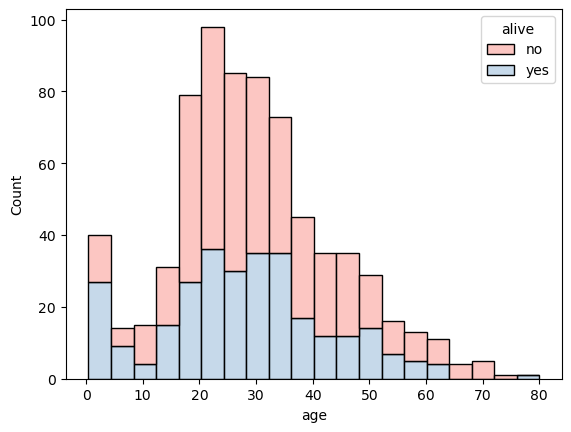

In [5]:
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack', palette='Pastel1')
# bins : 구간 갯수 고정

### 2.2 커널밀도추정 함수 그래프 (kdeplot)

<Axes: xlabel='age', ylabel='Density'>

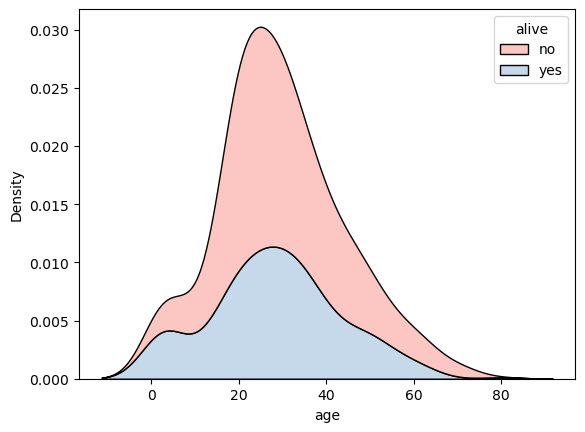

In [40]:
sns.kdeplot(data=titanic, x='age', hue='alive', multiple='stack', palette='Pastel1')

### 2.3 분포도 (displot)

- 분포도를 그릴 때는 histplot()과 kdeplot()을 둘 다 쓸 수 있는 displot()을 자주 사용

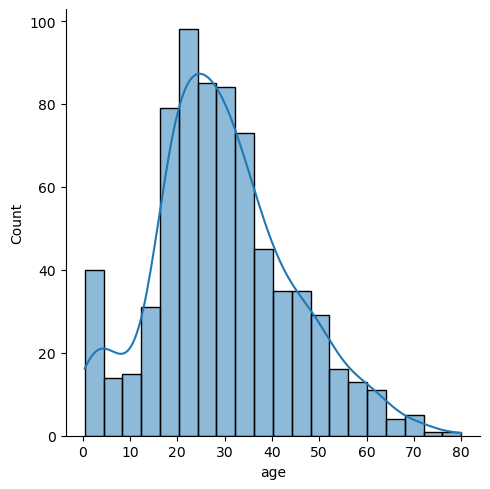

In [10]:
sns.displot(data=titanic, x='age', kde=True)

### 2.4 러그플롯 (rugplot)

- 주변 분포 (marginal distribution)을 나타냄
- 다른 분포도 그래프와 함께 사용

<Axes: xlabel='age', ylabel='Density'>

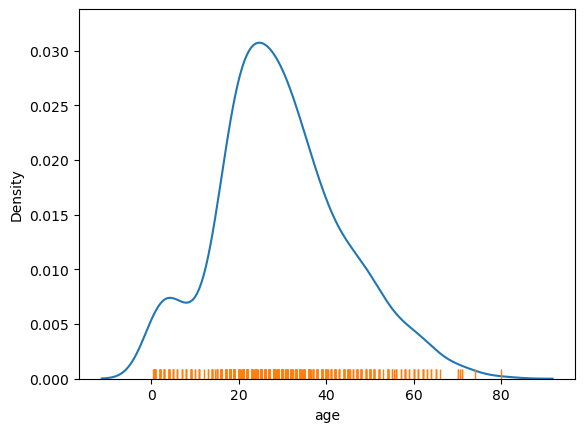

In [11]:
sns.kdeplot(data=titanic, x='age')
sns.rugplot(data=titanic, x='age')

## 3. 범주형 데이터 시각화

### 3.1 막대 그래프 (barplot)

- 평균 : 막대 그래프
- 신뢰구간 : 오차 막대 (error bar)

<Axes: xlabel='class', ylabel='fare'>

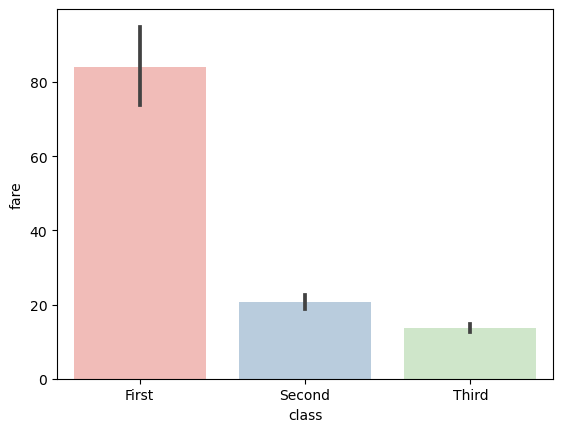

In [14]:
sns.barplot(data=titanic, x='class', y='fare', palette='Pastel1')

### 3.2 포인트플롯 (pointplot)

- 막대 그래프와 동일한 정보 제공 (점과 선으로 나타냄)
- 한 화면에 여러 그래프를 그릴 때 사용

<Axes: xlabel='class', ylabel='fare'>

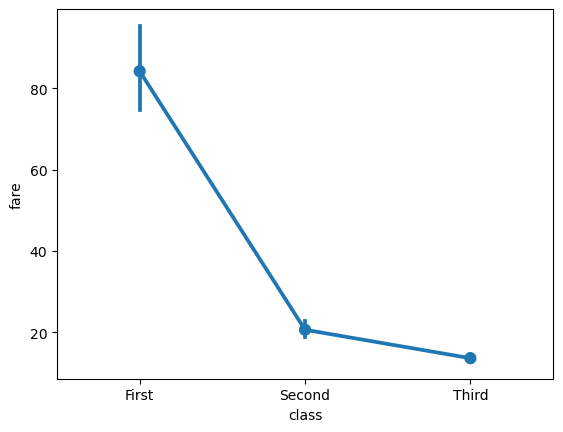

In [15]:
sns.pointplot(data=titanic, x='class', y='fare')

### 3.3 박스플롯 (boxplot)

- 5가지 요약 수치 (five-number summary)
    - Q1, Q2, Q3, IQR, max, min, 이상치

<Axes: xlabel='class', ylabel='age'>

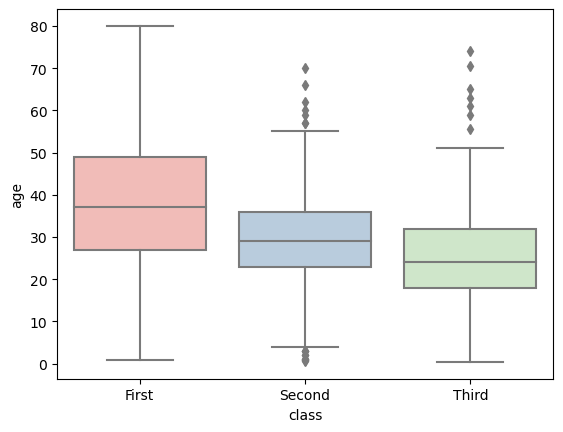

In [18]:
sns.boxplot(data=titanic, x='class', y='age', palette='Pastel1')

### 3.4 바이올린플롯 (violinplot)

- 박스플롯 + 커널밀도추정 함수 그래프

<Axes: xlabel='class', ylabel='age'>

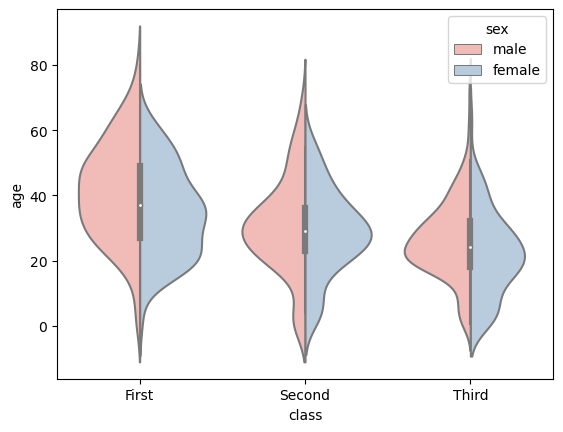

In [21]:
sns.violinplot(data=titanic, x='class', y='age', hue='sex', split=True, palette='Pastel1')

### 3.5 카운트플롯 (countplot)

- 데이터 개수를 확인
- 타깃 값의 분포 파악

<Axes: xlabel='count', ylabel='class'>

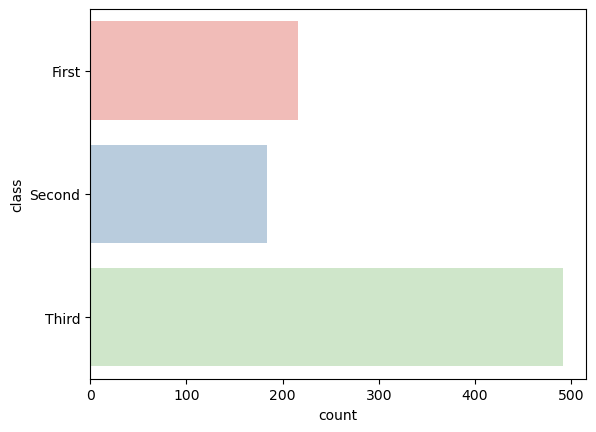

In [24]:
sns.countplot(data=titanic, y='class', palette='Pastel1')

### 3.6 파이 그래프 (pie)

- 범주형 데이터별 비율
- seaborn에서는 지원하지 않음 -> plt 사용

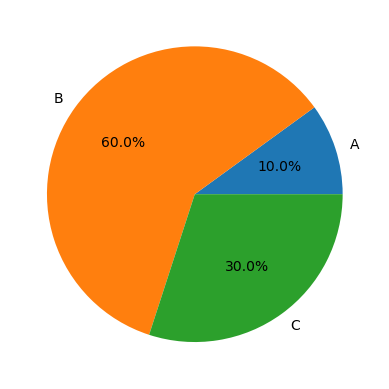

In [28]:
import matplotlib.pyplot as plt

x = [10, 60, 30]
labels = ['A', 'B', 'C']

plt.pie(x=x, labels=labels, autopct='%.1f%%')
plt.show()

## 4. 데이터 관계 시각화

### 4.1 히트맵 (heatmap)

In [29]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [30]:
flight_pivot = flights.pivot(index='month', columns='year', values='passengers')
flight_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

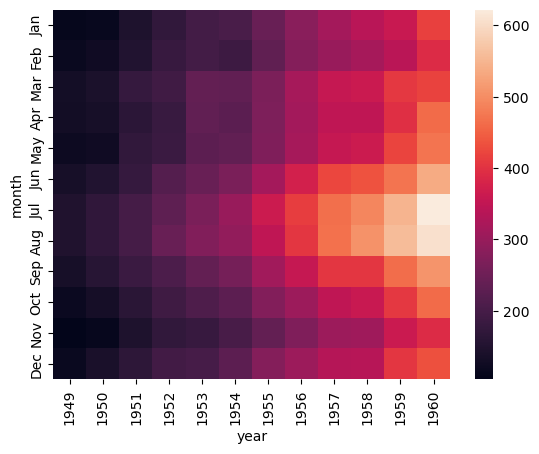

In [31]:
sns.heatmap(data=flight_pivot)

### 4.2 라인플롯 (lineplot)

- 두 수치형 데이터 사이의 관계
- y값의 평균과 95% 신뢰 구간을 나타냄

<Axes: xlabel='year', ylabel='passengers'>

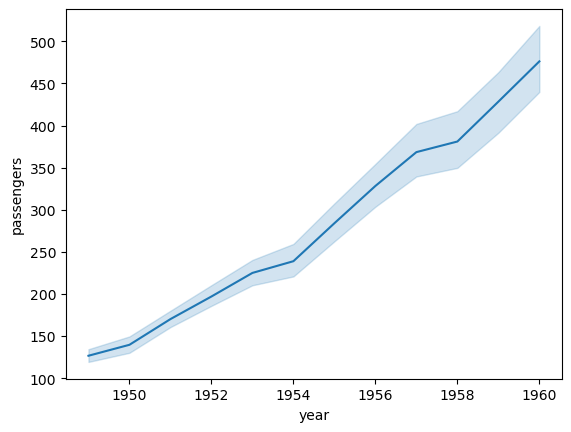

In [32]:
sns.lineplot(data=flights, x='year', y='passengers')

### 4.3 산점도 (scatterplot)

- 관계를 점으로 표현

In [33]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

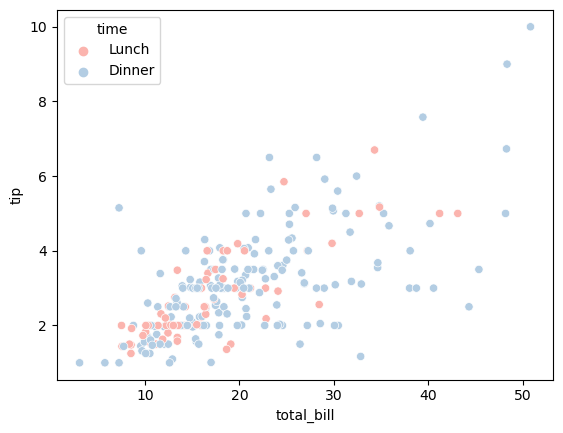

In [35]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', palette='Pastel1')

### 4.4 회귀선을 포함한 산점도 그래프 (regplot)

- 산점도와 회귀선을 동시에 표현

<Axes: xlabel='total_bill', ylabel='tip'>

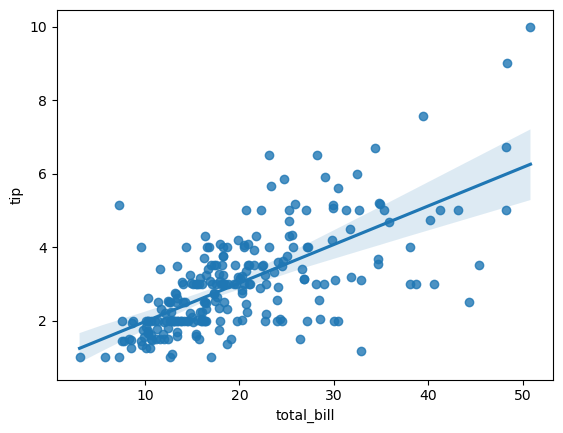

In [38]:
# ci : 신뢰구간 조절
sns.regplot(data=tips, x='total_bill', y='tip', ci=99)